In [72]:
import sqlite3 as LDBI
import pandas as pd
import matplotlib.pyplot as plt

db1 = LDBI.connect('Map.db')

In [ ]:
# import os
# os.environ["PROJ_LIB"] = "C:\\Users\\Borna\\Anaconda\\Library\\share"  # in order to properly import mpl_toolkits basemap

# from mpl_toolkits.basemap import Basemap    # use 'conda install basemap'
# import matplotlib.pyplot as plt
# import numpy as np

In [ ]:
# map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
#     resolution = 'i', area_thresh = 0.1,
#     llcrnrlon=-136.25, llcrnrlat=56.0,
#     urcrnrlon=-134.25, urcrnrlat=57.75)   # resolution can be:  
#                                           # c (crude), l (low), i (intermediate), h (high), f (full) or None

# map.drawcoastlines()
# map.drawcountries()
# map.fillcontinents(color = 'coral')
# map.drawmapboundary()

# lons = [-135.3318, -134.8331, -134.6572]
# lats = [57.0799, 57.0894, 56.2399]
# x,y = map(lons, lats)
# map.plot(x, y, 'bo', markersize=9)

# labels = ['Sitka', 'Baranof\n  Warm Springs', 'Port Alexander']
# x_offsets = [10000, -30000, -25000]
# y_offsets = [5000, -25000, -25000]
 
# for label, xpt, ypt, x_offset, y_offset in zip(labels, x, y, x_offsets, y_offsets):
#     plt.text(xpt+x_offset, ypt+y_offset, label)
    
# plt.show()

# plt.savefig('out.jpg', dpi = 1000)

In [73]:
list_assignments = """
    SELECT * FROM Roads
    """

# get a cursor for database #1
cu = db1.cursor()

# execute a QUERY
cu.execute(list_assignments)

i=0
# now show the result
for entry in cu:
#     print(entry)
    i+=1
    
print(i)

558


In [74]:
list_assignments = """
    SELECT * FROM sqlite_sequence
    """

cu = db1.cursor()
cu.execute(list_assignments)
i=0

for entry in cu:
#     print(entry)
    i+=1
    
print(i)


Roads = pd.read_sql_query("SELECT * from Roads", db1)
Features = pd.read_sql_query("SELECT * from Features", db1)
InstalledFeatures = pd.read_sql_query("SELECT * from InstalledFeatures", db1)
Intersections = pd.read_sql_query("SELECT * from Intersections", db1)
sqlite_sequence = pd.read_sql_query("SELECT * from sqlite_sequence", db1)

# cu.close()

3


In [178]:
res = db1.execute("SELECT name FROM sqlite_master WHERE type='table';")
for name in res:
    print name[0]

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(name[0])? (<ipython-input-178-011647120d13>, line 3)

In [ ]:
Roads

In [ ]:
Features

In [ ]:
InstalledFeatures

In [ ]:
Intersections

In [ ]:
sqlite_sequence

In [ ]:
pd.merge(Intersections, InstalledFeatures, left_on='ID', right_on='intersectionID')

In [ ]:
x = Intersections.X.tolist()
y = Intersections.Y.tolist()

# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Intersection Map')

plt.xticks([])
plt.yticks([])

plt.scatter(x, y, color='black', s=1.5)
plt.plot(x, y, 'o', color='black', markersize=1.5)


point1 = [Intersections.X.tolist()[0], Intersections.Y.tolist()[0]]
point2 = [Intersections.X.tolist()[1], Intersections.Y.tolist()[1]]

x_values = [point1[0], point2[0]]

y_values = [point1[1], point2[1]]


plt.plot(x_values, y_values, linewidth=.5)

plt.savefig('image.png', dpi=500)

plt.close()

In [ ]:
plt.savefig('image.png', dpi=500)

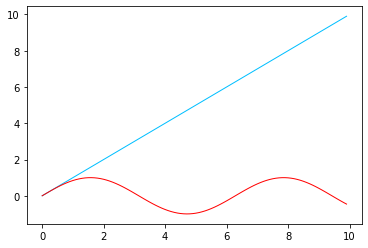

In [175]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,10,0.1)
y1 = x
y2 = np.sin(x)

plt.plot(x, y1, linewidth=1, color = 'deepskyblue')
fig1 = plt.gcf()

plt.plot(x, y2, linewidth=1, color = 'red')
fig2 = plt.gcf()

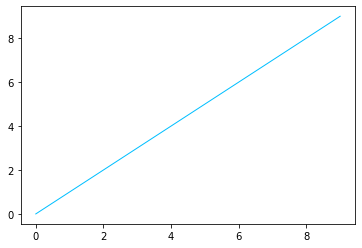

In [174]:
plt.plot(np.arange(0,10), np.arange(0,10), linewidth=1, color = 'deepskyblue')

In [181]:
InstalledFeatures

,ID,intersectionID,FeatureID
0,1557,4,2
1,1558,8,2
2,1559,9,1
3,1560,12,2
4,1561,16,2
...,...,...,...
103,1660,288,2
104,1661,292,2
105,1662,296,2
106,1663,297,1


In [182]:
Features

,ID,name
0,1,traffic light
1,2,crosswalks


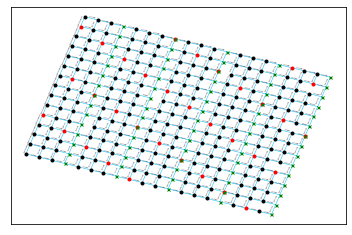

In [157]:

sd = 3  # size of the dots
sx = 3 # size of the crosses
f = 1.5 # fontsize

x = Intersections.X.tolist()
y = Intersections.Y.tolist()

plt.xticks([])
plt.yticks([])

# create a new slope function:  
# https://stackoverflow.com/questions/41462419/python-slope-given-two-points-find-the-slope-answer-works-doesnt-work/41462583
def slope(x1, y1, x2, y2):
    m = (y2-y1)/(x2-x1)
    return abs(m)

# plot the roads
for i in range(len(Roads)):
    index_0 = Roads.iloc[i].startNodeID
    index_1 = Roads.iloc[i].endNodeID

    x_values = [Intersections.iloc[index_0-1].X, Intersections.iloc[index_1-1].X]
    y_values = [Intersections.iloc[index_0-1].Y, Intersections.iloc[index_1-1].Y]
    plt.plot(x_values, y_values, linewidth=.5, color = 'deepskyblue')
    
fig_s = plt.gcf()
plt.savefig('image.png', dpi=500)
    
    
# plot the labels
for i in range(len(Roads)):
    index_0 = Roads.iloc[i].startNodeID
    index_1 = Roads.iloc[i].endNodeID

    x_value = (Intersections.iloc[index_0-1].X + Intersections.iloc[index_1-1].X)/2
    y_value = (Intersections.iloc[index_0-1].Y + Intersections.iloc[index_1-1].Y)/2

    m = slope(Intersections.iloc[index_0-1].X, Intersections.iloc[index_0-1].Y, 
                Intersections.iloc[index_1-1].X, Intersections.iloc[index_1-1].Y)

    if np.isclose(m, 0.3249197):
        rot = -13
        x_div = 8
        y_div = 1.5
    elif np.isclose(m, 3.0776835):
        rot = 66
        x_div = -4
        y_div = 1.5

    plt.text(x_value + 0.024/x_div, y_value + 0.008/y_div, Roads.iloc[i]['name'], fontsize=f, rotation=rot, 
             rotation_mode='anchor', ha = 'center', va = 'center')
    
fig_sn = plt.gcf()
plt.savefig('image2.png', dpi=500)
    
# plot red and green intersections
l = []
for index, row in InstalledFeatures.iterrows():
    if row.FeatureID == 1:
        plt.plot(x[row.intersectionID-1], y[row.intersectionID-1], 'o', color='red', markersize=sd)
        l.append(row.intersectionID)
    elif row.FeatureID == 2:
        plt.plot(x[row.intersectionID-1], y[row.intersectionID-1], 'x', color='green', markersize=sx)
        l.append(row.intersectionID)

# plot all other intersections
not_ints = list(set(l))
all_ints = Intersections.ID.tolist()
ints = [x for x in all_ints if x not in not_ints]   # select the intersections thathave not been plotted yet
for i in ints:
    plt.plot(x[i-1], y[i-1], 'o', color='black', markersize=sd)
    
fig_sni = plt.gcf()
plt.savefig('image3.png', dpi=500)

In [151]:
from IPython.display import display

In [163]:
plt.figure(fig_s.number)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

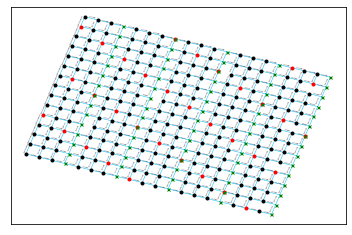

In [149]:
fig_s

In [91]:
for index, row in Roads.iterrows():
#     print(index, '\n', row)
    print(row['name'])

A Street
A Street
A Street
A Street
A Street
A Street
A Street
A Street
A Street
A Street
A Street
A Street
A Street
A Street
A Street
A Street
A Street
A Street
A Street
B Street
B Street
B Street
B Street
B Street
B Street
B Street
B Street
B Street
B Street
B Street
B Street
B Street
B Street
B Street
B Street
B Street
B Street
B Street
C Street
C Street
C Street
C Street
C Street
C Street
C Street
C Street
C Street
C Street
C Street
C Street
C Street
C Street
C Street
C Street
C Street
C Street
C Street
D Street
D Street
D Street
D Street
D Street
D Street
D Street
D Street
D Street
D Street
D Street
D Street
D Street
D Street
D Street
D Street
D Street
D Street
D Street
E Street
E Street
E Street
E Street
E Street
E Street
E Street
E Street
E Street
E Street
E Street
E Street
E Street
E Street
E Street
E Street
E Street
E Street
F Street
F Street
F Street
F Street
F Street
F Street
F Street
F Street
F Street
F Street
F Street
F Street
F Street
F Street
F Street
F Street
F Street
F

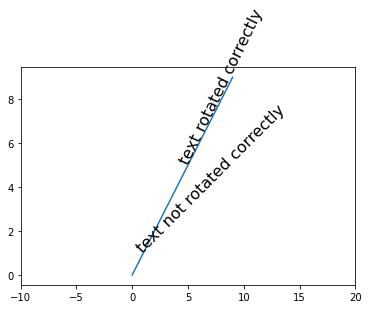

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Plot diagonal line (45 degrees)
h = plt.plot(np.arange(0, 10), np.arange(0, 10))

# set limits so that it no longer looks on screen to be 45 degrees
plt.xlim([-10, 20])

# Locations to plot text
l1 = np.array((1, 1))
l2 = np.array((5, 5))

# Rotate angle
angle = 45
trans_angle = plt.gca().transData.transform_angles(np.array((6,)),
                                                   l2.reshape((1, 2)))[0]

# Plot text
th1 = plt.text(l1[0], l1[1], 'text not rotated correctly', fontsize=16,
               rotation=angle, rotation_mode='anchor')
th2 = plt.text(l2[0], l2[1], 'text rotated correctly', fontsize=16,
               rotation=trans_angle, rotation_mode='anchor')

plt.show()

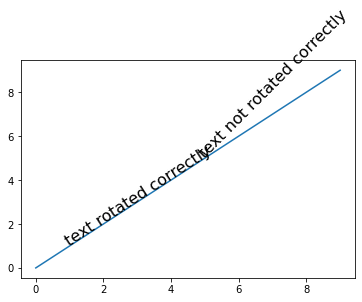

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Plot diagonal line (45 degrees)
h = plt.plot(np.arange(0, 10), np.arange(0, 10))

# set limits so that it no longer looks on screen to be 45 degrees
# plt.xlim([-10, 20])

# Locations to plot text
l2 = np.array((1, 1))
l1 = np.array((5, 5))

# Rotate angle
# angle = np.radians(45)
angle = 45
trans_angle = plt.gca().transData.transform_angles(np.array((45,)), l2.reshape((1, 2)))[0]

# Plot text
th1 = plt.text(l1[0], l1[1], 'text not rotated correctly', fontsize=16,
               rotation=angle, rotation_mode='anchor')
th2 = plt.text(l2[0], l2[1], 'text rotated correctly', fontsize=16,
               rotation=trans_angle, rotation_mode='anchor')

plt.show()

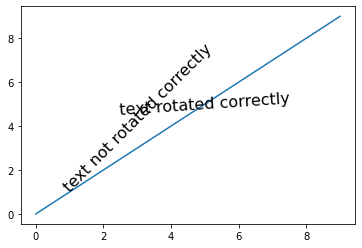

In [70]:
import matplotlib.pyplot as plt
import numpy as np

h = plt.plot(np.arange(0, 10), np.arange(0, 10))
# plt.xlim([-10, 20])

# Locations to plot text
l1 = np.array((1, 1))
l2 = np.array((5, 5))

# Rotate angle
angle = 45
trans_angle = plt.gca().transData.transform_angles(np.array((6,)),
                                                   l2.reshape((1, 2)))[0]

# Plot text
th1 = plt.text(l1[0], l1[1], 'text not rotated correctly', fontsize=16,
               rotation=angle, rotation_mode='anchor')
th2 = plt.text(l2[0], l2[1], 'text rotated correctly', fontsize=16,
               rotation=trans_angle, rotation_mode='anchor', ha = 'center', va = 'center')

plt.show()

In [57]:
np.degrees(6)

np.radians(360)

6.283185307179586

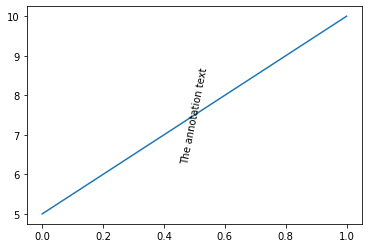

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x,y = np.array(((0,1),(5,10)))
fig, ax = plt.subplots()
ax.plot(x,y)

xylabel = ((x[0]+x[1])/2, (y[0]+y[1])/2)

dx, dy = x[1] - x[0], y[1] - y[0]
rotn = np.degrees(np.arctan2(dy, dx))
label = 'The annotation text'
ax.annotate(label, xy=xylabel, ha='center', va='center', rotation=rotn)

plt.show()

<Figure size 432x288 with 0 Axes>

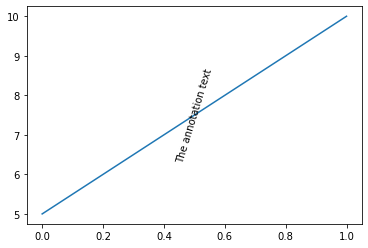

In [10]:
plt.clf()
fig, ax = plt.subplots()
ax.plot(x,y)
p1 = ax.transData.transform_point((x[0], y[0]))
p2 = ax.transData.transform_point((x[1], y[1]))
dy = (p2[1] - p1[1])
dx = (p2[0] - p1[0])
rotn = np.degrees(np.arctan2(dy, dx))
ax.annotate(label, xy=xylabel, ha='center', va='center', rotation=rotn)

plt.show()

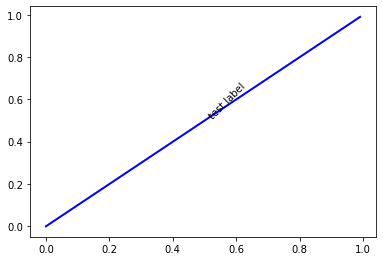

NameError: name 'gca' is not defined

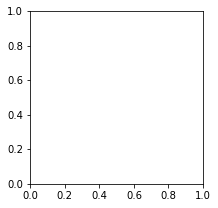

In [5]:
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0.15, 0.1, 0.8, 0.8])
t = np.arange(0.0, 1.0, 0.01)
line, = ax.plot(t, t, color='blue', lw=2)
ax.text(0.51,0.51,"test label", rotation=45)
plt.show()


for fig_size in [(3.0,3.0),(9.0,3.0),(3.0,9.0)]: #use different sizes, in inches
    fig2 = plt.figure(figsize=fig_size)
    ax = fig2.add_axes([0.15, 0.1, 0.8, 0.8])
    text_plot_location = np.array([0.51,0.51]) #I'm using the same location for plotting text as you did above
    trans_angle = gca().transData.transform_angles(np.array((45,)),text_plot_location.reshape((1,2)))[0]
    line, = ax.plot(t, t, color='blue', lw=2)
    ax.text(0.51,0.51,"test label", rotation=trans_angle)
    plt.show()